In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import readdy

In [2]:
n = 50
system = readdy.ReactionDiffusionSystem([n,n,n], temperature=300.*readdy.units.kelvin, periodic_boundary_conditions=[False, False, False])


system.add_species("Ca", diffusion_constant=100)
system.add_species("Ves", diffusion_constant=20)
system.add_species("Ves1", diffusion_constant=20)
system.add_species("Ves2", diffusion_constant=20)
system.add_species("Ves3", diffusion_constant=20)
system.add_species("Ves4", diffusion_constant=20)
system.add_species("Ves5", diffusion_constant=10)

system.potentials.add_box("Ves5", 50., [-25, -25, -25], [5, 45, 45])

In [3]:
system.potentials.add_box("Ca", 10., [-(n/2 -1), -(n/2 -1), -(n/2 -1)], [n-2,n-2,n-2])
system.potentials.add_box("Ves", 10.,[-(n/2 -1), -(n/2 -1), -(n/2 -1)], [n-2,n-2,n-2])
system.potentials.add_box("Ves1", 10.,[-(n/2 -1), -(n/2 -1), -(n/2 -1)], [n-2,n-2,n-2])
system.potentials.add_box("Ves2", 10., [-(n/2 -1), -(n/2 -1), -(n/2 -1)], [n-2,n-2,n-2])
system.potentials.add_box("Ves3", 10., [-(n/2 -1), -(n/2 -1), -(n/2 -1)], [n-2,n-2,n-2])
system.potentials.add_box("Ves4", 10., [-(n/2 -1), -(n/2 -1), -(n/2 -1)], [n-2,n-2,n-2])

#system.potentials.add_weak_interaction_piecewise_harmonic(
 #   "Ca", "Ves1", force_constant=20., desired_distance=0.1, depth=2., cutoff=7.
#)
#system.potentials.add_weak_interaction_piecewise_harmonic(
 #   "Ca", "Ves2", force_constant=20., desired_distance=0.1, depth=2., cutoff=7.##
#)
#system.potentials.add_weak_interaction_piecewise_harmonic(
 #   "Ca", "Ves3", force_constant=20., desired_distance=0.1, depth=2., cutoff=7.
#)
#system.potentials.add_weak_interaction_piecewise_harmonic(
 #   "Ca", "Ves4", force_constant=20., desired_distance=0.1, depth=2., cutoff=7.
#)


In [4]:
lambda_on = 1.
system.reactions.add("fusion1: Ves + (5) Ca -> Ves1", rate=6/readdy.units.nanosecond)
system.reactions.add("fusion2: Ves1 + (4) Ca -> Ves2", rate=8/readdy.units.nanosecond)
system.reactions.add("fusion3: Ves2 + (3) Ca -> Ves3", rate=10/readdy.units.nanosecond)
system.reactions.add("fusion4: Ves3 + (2) Ca -> Ves4", rate=12/readdy.units.nanosecond)
system.reactions.add("fusion5: Ves4 + (1) Ca -> Ves5", rate=14/readdy.units.nanosecond)
system.reactions.add("fission1: Ves1 -> Ves + (1) Ca", rate=3/readdy.units.nanosecond)
system.reactions.add("fission2: Ves2 -> Ves1 + (1) Ca", rate=2.5/readdy.units.nanosecond)
system.reactions.add("fission3: Ves3 -> Ves2 + (1) Ca", rate=2/readdy.units.nanosecond)
system.reactions.add("fission4: Ves4 -> Ves3 + (1) Ca", rate=1.5/readdy.units.nanosecond)
system.reactions.add("fission5: Ves5 -> Ves4 + (1) Ca", rate=1/readdy.units.nanosecond)

In [5]:
simulation = system.simulation(kernel="CPU")
simulation.output_file = "exp2.h5"
simulation.reaction_handler = "Gillespie"

n_particles = 200
initial_positions_Ca =  np.random.uniform(-(n/2 -1),-(n/2 -1),(200,3))
initial_positions_Ves = np.random.random(size=(10, 3)) * n - n/2
simulation.add_particles("Ca", initial_positions_Ca)
simulation.add_particles("Ves", initial_positions_Ves)
#simulation.add_particles("Ves5", initial_positions_Ves)

simulation.observe.number_of_particles(
    stride=20,
    types=["Ca", "Ves", "Ves1", "Ves2", "Ves3", "Ves4", "Ves5"],
    callback=lambda x: print(x)
)

simulation.record_trajectory()

In [6]:
if os.path.exists(simulation.output_file):
    os.remove(simulation.output_file)

simulation.run(n_steps=10000, timestep=1e-3*readdy.units.nanosecond)

Configured kernel context with:
--------------------------------
 - kBT = 2.4943390049691634
 - periodic b.c. = (false, false, false)
 - box size = (50, 50, 50)
 - particle types:
     *  particle type "Ves5" with D=10
     *  particle type "Ves4" with D=20
     *  particle type "Ves3" with D=20
     *  particle type "Ves2" with D=20
     *  particle type "Ves1" with D=20
     *  particle type "Ves" with D=20
     *  particle type "Ca" with D=100
 - potentials of order 1:
     * for type "Ves4"
         * Harmonic Box inclusion potential with force constant 10 and parameters minimum vertex v0=(-24,-24,-24) and maximum vertex v1=(24,24,24).
     * for type "Ves3"
         * Harmonic Box inclusion potential with force constant 10 and parameters minimum vertex v0=(-24,-24,-24) and maximum vertex v1=(24,24,24).
     * for type "Ves2"
         * Harmonic Box inclusion potential with force constant 10 and parameters minimum vertex v0=(-24,-24,-24) and maximum vertex v1=(24,24,24).
     * for

  0%|▏                                         | 3/1000 [00:00<00:33, 29.82it/s]

[200, 10, 0, 0, 0, 0, 0]
[200, 10, 0, 0, 0, 0, 0]
[200, 10, 0, 0, 0, 0, 0]
[200, 10, 0, 0, 0, 0, 0]


  1%|▌                                        | 13/1000 [00:00<00:24, 40.08it/s]

[200, 10, 0, 0, 0, 0, 0]
[197, 9, 0, 0, 1, 0, 0]
[197, 9, 0, 0, 1, 0, 0]
[196, 9, 0, 0, 0, 1, 0]
[196, 9, 0, 0, 0, 1, 0]
[195, 8, 1, 0, 0, 1, 0]


  3%|█▏                                       | 29/1000 [00:00<00:16, 58.74it/s]

[195, 8, 1, 0, 0, 1, 0]
[195, 8, 1, 0, 0, 1, 0]
[195, 8, 1, 0, 0, 1, 0]
[196, 8, 1, 0, 1, 0, 0]
[196, 8, 1, 0, 1, 0, 0]
[195, 8, 0, 1, 1, 0, 0]
[195, 8, 0, 1, 1, 0, 0]
[195, 8, 0, 1, 1, 0, 0]


  5%|█▉                                       | 46/1000 [00:00<00:13, 72.46it/s]

[194, 8, 0, 1, 0, 1, 0]
[194, 8, 0, 1, 0, 1, 0]
[194, 8, 0, 1, 0, 1, 0]
[194, 8, 0, 1, 0, 1, 0]
[194, 8, 0, 1, 0, 1, 0]
[194, 8, 0, 1, 0, 1, 0]
[196, 9, 0, 0, 0, 1, 0]
[196, 9, 0, 0, 0, 1, 0]
[194, 8, 0, 1, 0, 1, 0]
[194, 8, 0, 1, 0, 1, 0]


  8%|███                                      | 75/1000 [00:01<00:10, 89.18it/s]

[194, 8, 0, 1, 0, 1, 0]
[193, 8, 0, 0, 1, 1, 0]
[193, 8, 0, 0, 1, 1, 0]
[193, 8, 0, 0, 1, 1, 0]
[193, 8, 0, 0, 1, 1, 0]
[193, 8, 0, 0, 1, 1, 0]
[193, 8, 0, 0, 1, 1, 0]
[192, 8, 0, 0, 0, 2, 0]
[192, 8, 0, 0, 0, 2, 0]
[192, 8, 0, 0, 0, 2, 0]


 10%|███▉                                     | 96/1000 [00:01<00:09, 96.36it/s]

[192, 8, 0, 0, 0, 2, 0]
[191, 8, 0, 0, 0, 1, 1]
[190, 7, 1, 0, 0, 1, 1]
[190, 7, 1, 0, 0, 1, 1]
[189, 7, 0, 1, 0, 1, 1]
[189, 7, 0, 1, 0, 1, 1]
[188, 6, 1, 1, 0, 1, 1]
[187, 5, 2, 1, 0, 1, 1]
[187, 5, 2, 1, 0, 1, 1]
[187, 5, 2, 1, 0, 1, 1]
[187, 5, 2, 1, 0, 1, 1]


 12%|████▌                                  | 118/1000 [00:01<00:08, 103.21it/s]

[187, 5, 2, 1, 0, 1, 1]
[186, 4, 3, 1, 0, 1, 1]
[186, 4, 3, 1, 0, 1, 1]
[186, 4, 3, 1, 0, 1, 1]
[187, 5, 2, 1, 0, 1, 1]
[187, 5, 2, 1, 0, 1, 1]
[186, 4, 3, 1, 0, 1, 1]
[186, 4, 3, 1, 0, 1, 1]
[186, 5, 1, 2, 0, 1, 1]
[185, 5, 0, 3, 0, 1, 1]
[184, 4, 1, 3, 0, 1, 1]


 14%|█████▍                                 | 141/1000 [00:01<00:07, 107.73it/s]

[184, 4, 1, 3, 0, 1, 1]
[183, 3, 2, 3, 0, 1, 1]
[182, 3, 2, 2, 1, 1, 1]
[183, 3, 3, 1, 1, 1, 1]
[183, 3, 3, 1, 1, 1, 1]
[181, 3, 2, 1, 2, 1, 1]
[181, 3, 2, 1, 2, 1, 1]
[180, 3, 2, 0, 3, 1, 1]
[180, 3, 2, 0, 3, 1, 1]
[180, 3, 2, 0, 3, 1, 1]
[180, 3, 2, 0, 3, 1, 1]
[181, 4, 1, 0, 3, 1, 1]


 16%|██████▍                                | 164/1000 [00:01<00:07, 110.13it/s]

[181, 4, 1, 0, 3, 1, 1]
[181, 4, 1, 0, 3, 1, 1]
[181, 4, 1, 0, 3, 1, 1]
[179, 2, 3, 0, 3, 1, 1]
[179, 2, 3, 0, 3, 1, 1]
[178, 2, 2, 1, 3, 1, 1]
[177, 2, 2, 1, 2, 2, 1]
[177, 2, 2, 1, 2, 2, 1]
[177, 2, 2, 1, 2, 2, 1]
[177, 2, 2, 1, 2, 2, 1]
[177, 2, 2, 1, 2, 2, 1]
[178, 2, 2, 2, 1, 2, 1]


 19%|███████▎                               | 189/1000 [00:02<00:07, 114.48it/s]

[178, 2, 2, 2, 1, 2, 1]
[178, 2, 2, 2, 1, 2, 1]
[178, 2, 2, 2, 1, 2, 1]
[178, 2, 2, 2, 1, 2, 1]
[178, 2, 2, 2, 1, 2, 1]
[177, 2, 1, 3, 1, 2, 1]
[177, 1, 3, 2, 1, 2, 1]
[180, 3, 2, 1, 1, 2, 1]
[180, 3, 2, 1, 1, 2, 1]
[180, 3, 2, 1, 1, 2, 1]
[179, 2, 3, 1, 1, 2, 1]
[179, 2, 3, 1, 1, 2, 1]
[180, 2, 2, 3, 0, 3, 0]


 21%|████████▎                              | 214/1000 [00:02<00:06, 114.81it/s]

[180, 2, 2, 3, 0, 3, 0]
[181, 2, 2, 3, 1, 2, 0]
[181, 2, 2, 3, 1, 2, 0]
[182, 3, 1, 3, 1, 2, 0]
[182, 3, 1, 3, 1, 2, 0]
[181, 2, 2, 3, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[178, 1, 2, 3, 2, 2, 0]
[179, 1, 2, 3, 3, 1, 0]
[179, 1, 2, 3, 3, 1, 0]
[178, 1, 2, 3, 2, 2, 0]
[179, 1, 3, 2, 2, 2, 0]


 24%|█████████▎                             | 239/1000 [00:02<00:06, 112.83it/s]

[179, 1, 3, 2, 2, 2, 0]
[180, 2, 2, 2, 2, 2, 0]
[179, 2, 2, 1, 3, 2, 0]
[180, 2, 2, 2, 2, 2, 0]
[179, 1, 3, 2, 2, 2, 0]
[179, 1, 3, 2, 2, 2, 0]
[182, 2, 2, 4, 0, 2, 0]
[181, 2, 2, 4, 0, 1, 1]
[180, 2, 2, 3, 1, 1, 1]
[178, 1, 2, 4, 1, 1, 1]
[177, 1, 2, 3, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]


 26%|██████████▎                            | 263/1000 [00:02<00:06, 114.84it/s]

[178, 1, 3, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[177, 1, 3, 1, 3, 1, 1]
[177, 1, 3, 1, 3, 1, 1]
[177, 0, 4, 2, 2, 1, 1]
[177, 0, 4, 2, 2, 1, 1]
[177, 0, 4, 2, 2, 1, 1]
[178, 0, 5, 1, 2, 1, 1]


 29%|███████████▏                           | 288/1000 [00:02<00:06, 116.02it/s]

[178, 1, 2, 4, 1, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[177, 1, 3, 1, 3, 1, 1]
[176, 1, 2, 2, 3, 1, 1]
[176, 1, 2, 2, 3, 1, 1]
[176, 1, 2, 2, 3, 1, 1]
[176, 1, 2, 2, 3, 1, 1]
[177, 1, 2, 2, 4, 0, 1]
[178, 1, 2, 3, 3, 0, 1]
[178, 1, 2, 3, 3, 0, 1]


 31%|████████████▏                          | 313/1000 [00:03<00:05, 117.15it/s]

[178, 1, 2, 3, 3, 0, 1]
[178, 1, 2, 3, 3, 0, 1]
[178, 1, 2, 3, 3, 0, 1]
[179, 1, 3, 2, 3, 0, 1]
[178, 1, 3, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[180, 2, 2, 3, 1, 1, 1]
[179, 2, 2, 2, 2, 1, 1]
[179, 2, 2, 2, 2, 1, 1]
[179, 2, 2, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[178, 1, 3, 2, 2, 1, 1]
[176, 1, 2, 3, 1, 2, 1]


 34%|█████████████▏                         | 339/1000 [00:03<00:05, 122.00it/s]

[176, 1, 2, 3, 1, 2, 1]
[177, 1, 2, 4, 0, 2, 1]
[178, 2, 1, 4, 0, 2, 1]
[178, 2, 1, 4, 0, 2, 1]
[177, 1, 2, 4, 0, 2, 1]
[176, 1, 1, 5, 0, 2, 1]
[177, 1, 2, 4, 0, 2, 1]
[177, 1, 2, 4, 0, 2, 1]
[177, 1, 2, 4, 0, 2, 1]
[177, 1, 2, 4, 0, 2, 1]
[177, 1, 2, 4, 0, 2, 1]
[177, 1, 2, 4, 0, 2, 1]
[177, 1, 2, 3, 1, 3, 0]


 37%|██████████████▎                        | 366/1000 [00:03<00:05, 123.98it/s]

[177, 1, 2, 3, 1, 3, 0]
[178, 1, 3, 2, 1, 3, 0]
[177, 1, 3, 1, 2, 3, 0]
[177, 1, 3, 1, 2, 3, 0]
[177, 1, 3, 1, 2, 3, 0]
[178, 2, 2, 1, 2, 3, 0]
[178, 2, 2, 1, 2, 3, 0]
[178, 2, 2, 1, 2, 3, 0]
[178, 2, 2, 1, 2, 3, 0]
[178, 1, 3, 2, 1, 3, 0]
[178, 2, 2, 1, 2, 3, 0]
[179, 2, 2, 1, 3, 2, 0]
[179, 2, 2, 1, 3, 2, 0]


 39%|███████████████▎                       | 392/1000 [00:03<00:05, 120.52it/s]

[179, 2, 2, 1, 3, 2, 0]
[178, 2, 1, 2, 3, 2, 0]
[178, 2, 1, 2, 3, 2, 0]
[178, 2, 1, 2, 3, 2, 0]
[178, 2, 1, 2, 3, 2, 0]
[178, 2, 1, 2, 3, 2, 0]
[177, 2, 0, 3, 3, 2, 0]
[177, 2, 0, 3, 3, 2, 0]
[177, 2, 0, 3, 3, 2, 0]
[177, 2, 0, 3, 3, 2, 0]
[176, 2, 0, 2, 4, 2, 0]
[176, 2, 0, 2, 4, 2, 0]
[176, 2, 0, 2, 4, 2, 0]


 42%|████████████████▎                      | 418/1000 [00:04<00:04, 120.45it/s]

[176, 2, 0, 2, 4, 2, 0]
[176, 2, 0, 2, 4, 2, 0]
[176, 2, 0, 2, 4, 2, 0]
[176, 2, 0, 2, 4, 2, 0]
[175, 2, 0, 2, 3, 3, 0]
[175, 2, 0, 2, 3, 3, 0]
[175, 2, 0, 2, 3, 3, 0]
[175, 2, 0, 2, 3, 3, 0]
[174, 2, 0, 1, 4, 3, 0]
[175, 2, 0, 2, 3, 3, 0]
[175, 2, 0, 2, 3, 3, 0]
[176, 2, 0, 2, 4, 2, 0]
[177, 2, 0, 3, 3, 2, 0]


 44%|█████████████████▎                     | 445/1000 [00:04<00:04, 123.54it/s]

[177, 2, 0, 3, 3, 2, 0]
[178, 2, 1, 2, 3, 2, 0]
[178, 2, 1, 2, 3, 2, 0]
[179, 2, 1, 3, 2, 2, 0]
[180, 3, 0, 3, 2, 2, 0]
[179, 2, 1, 3, 2, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]


 47%|██████████████████▍                    | 472/1000 [00:04<00:04, 124.17it/s]

[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[179, 2, 0, 5, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[181, 2, 2, 3, 1, 2, 0]
[181, 2, 2, 3, 1, 2, 0]
[181, 2, 2, 3, 1, 2, 0]
[181, 2, 2, 3, 1, 2, 0]
[181, 2, 2, 3, 1, 2, 0]
[180, 1, 3, 3, 1, 2, 0]


 50%|███████████████████▍                   | 498/1000 [00:04<00:03, 125.69it/s]

[180, 1, 3, 3, 1, 2, 0]
[178, 1, 2, 3, 2, 2, 0]
[178, 1, 2, 3, 2, 2, 0]
[178, 1, 2, 3, 2, 2, 0]
[178, 1, 2, 3, 2, 2, 0]
[178, 1, 2, 3, 2, 2, 0]
[178, 1, 2, 3, 2, 2, 0]
[176, 1, 1, 3, 3, 2, 0]
[177, 1, 1, 4, 2, 2, 0]
[176, 1, 1, 3, 3, 2, 0]
[176, 1, 1, 3, 3, 2, 0]
[177, 1, 1, 4, 2, 2, 0]
[175, 1, 1, 3, 3, 1, 1]


 52%|████████████████████▍                  | 524/1000 [00:04<00:03, 124.63it/s]

[175, 1, 1, 3, 3, 1, 1]
[175, 1, 1, 3, 3, 1, 1]
[174, 0, 2, 3, 3, 1, 1]
[174, 0, 3, 1, 4, 1, 1]
[174, 0, 3, 1, 4, 1, 1]
[174, 0, 3, 1, 4, 1, 1]
[174, 0, 3, 1, 4, 1, 1]
[174, 0, 3, 1, 4, 1, 1]
[174, 0, 3, 1, 4, 1, 1]
[174, 0, 3, 1, 4, 1, 1]
[175, 1, 2, 1, 4, 1, 1]
[175, 1, 2, 1, 4, 1, 1]
[175, 1, 2, 1, 4, 1, 1]


 55%|█████████████████████▍                 | 550/1000 [00:05<00:03, 122.87it/s]

[176, 1, 2, 2, 3, 1, 1]
[176, 1, 2, 2, 3, 1, 1]
[177, 1, 2, 2, 4, 0, 1]
[178, 2, 1, 2, 4, 0, 1]
[178, 2, 1, 2, 4, 0, 1]
[176, 1, 0, 5, 3, 0, 1]
[176, 1, 0, 5, 3, 0, 1]
[177, 1, 0, 5, 3, 1, 0]
[176, 1, 0, 5, 2, 2, 0]
[177, 1, 1, 4, 2, 2, 0]
[177, 1, 1, 4, 2, 2, 0]
[177, 1, 1, 4, 2, 2, 0]
[176, 1, 1, 3, 3, 2, 0]


 58%|██████████████████████▍                | 576/1000 [00:05<00:03, 122.32it/s]

[177, 1, 2, 2, 3, 2, 0]
[174, 0, 2, 2, 4, 2, 0]
[175, 0, 2, 3, 3, 2, 0]
[175, 0, 2, 3, 3, 2, 0]
[175, 0, 2, 2, 5, 1, 0]
[175, 0, 2, 2, 5, 1, 0]
[175, 0, 2, 2, 5, 1, 0]
[175, 0, 2, 2, 5, 1, 0]
[175, 0, 2, 2, 5, 1, 0]
[175, 0, 2, 2, 5, 1, 0]
[175, 0, 2, 2, 5, 1, 0]
[175, 0, 2, 2, 5, 1, 0]
[175, 0, 2, 2, 5, 1, 0]


 60%|███████████████████████▌               | 603/1000 [00:05<00:03, 125.94it/s]

[175, 0, 2, 2, 5, 1, 0]
[176, 1, 1, 2, 5, 1, 0]
[176, 1, 1, 2, 5, 1, 0]
[176, 1, 1, 2, 5, 1, 0]
[177, 1, 1, 3, 4, 1, 0]
[177, 1, 1, 3, 4, 1, 0]
[177, 1, 1, 3, 4, 1, 0]
[178, 1, 1, 4, 3, 1, 0]
[178, 1, 1, 4, 3, 1, 0]
[177, 1, 1, 3, 4, 1, 0]
[178, 1, 2, 2, 4, 1, 0]
[179, 1, 3, 1, 4, 1, 0]
[179, 1, 3, 1, 4, 1, 0]


 62%|████████████████████████               | 616/1000 [00:05<00:03, 122.84it/s]

[179, 1, 3, 1, 4, 1, 0]
[180, 2, 2, 1, 4, 1, 0]
[180, 2, 2, 1, 4, 1, 0]
[180, 2, 2, 1, 4, 1, 0]
[180, 2, 2, 1, 4, 1, 0]
[180, 2, 2, 1, 4, 1, 0]
[181, 2, 2, 1, 5, 0, 0]
[181, 2, 2, 1, 5, 0, 0]
[180, 2, 1, 2, 5, 0, 0]
[180, 2, 1, 2, 5, 0, 0]
[179, 2, 0, 3, 5, 0, 0]
[179, 2, 0, 3, 5, 0, 0]
[179, 2, 0, 3, 5, 0, 0]


 64%|█████████████████████████              | 642/1000 [00:05<00:02, 119.93it/s]

[177, 0, 2, 3, 5, 0, 0]
[177, 0, 2, 3, 5, 0, 0]
[177, 0, 1, 5, 4, 0, 0]
[177, 0, 1, 5, 4, 0, 0]
[177, 0, 1, 5, 4, 0, 0]
[177, 0, 1, 5, 4, 0, 0]
[177, 0, 1, 5, 4, 0, 0]
[176, 0, 1, 5, 3, 1, 0]
[176, 0, 1, 5, 3, 1, 0]
[177, 0, 2, 4, 3, 1, 0]
[177, 0, 2, 4, 3, 1, 0]
[177, 0, 2, 4, 3, 1, 0]
[177, 0, 2, 4, 3, 1, 0]


 67%|██████████████████████████             | 669/1000 [00:06<00:02, 117.76it/s]

[177, 0, 2, 4, 3, 1, 0]
[177, 0, 2, 4, 3, 1, 0]
[177, 1, 0, 5, 3, 1, 0]
[176, 0, 1, 5, 3, 1, 0]
[176, 0, 1, 5, 3, 1, 0]
[176, 0, 1, 5, 3, 1, 0]
[176, 0, 1, 5, 3, 1, 0]
[175, 0, 0, 6, 3, 1, 0]
[174, 0, 0, 5, 4, 1, 0]
[174, 0, 0, 5, 4, 1, 0]
[174, 0, 0, 5, 4, 1, 0]
[174, 0, 0, 5, 4, 1, 0]


 70%|███████████████████████████            | 695/1000 [00:06<00:02, 121.79it/s]

[174, 0, 0, 5, 4, 1, 0]
[173, 0, 0, 4, 5, 1, 0]
[173, 0, 0, 4, 5, 1, 0]
[173, 0, 0, 4, 5, 1, 0]
[174, 0, 0, 5, 4, 1, 0]
[174, 0, 0, 5, 4, 1, 0]
[175, 0, 0, 6, 3, 1, 0]
[175, 0, 0, 6, 3, 1, 0]
[175, 0, 0, 6, 3, 1, 0]
[175, 0, 0, 6, 3, 1, 0]
[176, 0, 1, 5, 3, 1, 0]
[178, 0, 2, 5, 2, 1, 0]
[178, 0, 2, 5, 2, 1, 0]


 72%|████████████████████████████           | 721/1000 [00:06<00:02, 121.35it/s]

[179, 0, 3, 4, 2, 1, 0]
[177, 0, 2, 5, 1, 2, 0]
[179, 1, 2, 4, 1, 2, 0]
[180, 2, 1, 4, 1, 2, 0]
[179, 1, 1, 6, 0, 2, 0]
[180, 1, 3, 3, 1, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[177, 0, 3, 3, 2, 2, 0]
[176, 0, 3, 2, 3, 2, 0]
[176, 0, 3, 2, 3, 2, 0]
[176, 0, 3, 2, 3, 2, 0]
[176, 0, 3, 2, 3, 2, 0]


 75%|█████████████████████████████▏         | 747/1000 [00:06<00:02, 121.62it/s]

[176, 0, 3, 2, 3, 2, 0]
[177, 0, 4, 1, 3, 2, 0]
[178, 1, 3, 1, 3, 2, 0]
[177, 0, 4, 1, 3, 2, 0]
[180, 2, 2, 2, 2, 2, 0]
[180, 1, 3, 3, 1, 2, 0]
[180, 1, 3, 3, 1, 2, 0]
[178, 1, 2, 3, 2, 2, 0]
[179, 2, 1, 3, 2, 2, 0]
[179, 2, 2, 2, 1, 3, 0]
[180, 2, 2, 3, 0, 3, 0]
[180, 3, 1, 2, 1, 3, 0]
[179, 1, 3, 2, 2, 2, 0]


 77%|██████████████████████████████▏        | 773/1000 [00:06<00:01, 122.09it/s]

[180, 2, 2, 2, 2, 2, 0]
[177, 1, 2, 3, 1, 3, 0]
[177, 1, 2, 3, 1, 3, 0]
[178, 1, 2, 3, 2, 2, 0]
[179, 1, 2, 3, 3, 1, 0]
[179, 1, 2, 3, 3, 1, 0]
[179, 1, 2, 3, 3, 1, 0]
[179, 1, 2, 3, 3, 1, 0]
[178, 1, 2, 2, 4, 1, 0]
[177, 1, 1, 3, 4, 1, 0]
[178, 1, 1, 4, 3, 1, 0]
[176, 1, 1, 3, 3, 2, 0]
[176, 1, 1, 3, 3, 2, 0]


 80%|███████████████████████████████▏       | 800/1000 [00:07<00:01, 123.51it/s]

[176, 1, 1, 3, 3, 2, 0]
[177, 2, 0, 3, 3, 2, 0]
[178, 2, 1, 2, 3, 2, 0]
[177, 1, 2, 2, 3, 2, 0]
[177, 1, 2, 2, 3, 2, 0]
[177, 1, 2, 2, 3, 2, 0]
[176, 0, 3, 2, 3, 2, 0]
[177, 0, 3, 3, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[177, 0, 4, 1, 3, 2, 0]
[177, 0, 4, 1, 3, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[177, 0, 3, 3, 2, 2, 0]


 83%|████████████████████████████████▏      | 826/1000 [00:07<00:01, 121.26it/s]

[177, 0, 3, 3, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[179, 0, 5, 1, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[178, 0, 4, 2, 2, 2, 0]
[179, 1, 3, 2, 2, 2, 0]
[180, 1, 4, 1, 2, 2, 0]
[180, 1, 4, 1, 2, 2, 0]


 85%|█████████████████████████████████▏     | 852/1000 [00:07<00:01, 120.69it/s]

[180, 1, 4, 1, 2, 2, 0]
[180, 1, 4, 1, 2, 2, 0]
[179, 1, 3, 2, 2, 2, 0]
[178, 1, 3, 1, 3, 2, 0]
[179, 2, 2, 1, 3, 2, 0]
[179, 2, 2, 1, 3, 2, 0]
[179, 2, 2, 1, 3, 2, 0]
[179, 2, 2, 1, 3, 2, 0]
[179, 2, 2, 1, 3, 2, 0]
[177, 1, 2, 2, 3, 2, 0]
[176, 1, 1, 3, 3, 2, 0]
[177, 1, 1, 3, 4, 1, 0]
[176, 0, 2, 3, 4, 1, 0]


 88%|██████████████████████████████████▏    | 878/1000 [00:07<00:00, 122.22it/s]

[176, 0, 2, 3, 4, 1, 0]
[176, 0, 2, 3, 4, 1, 0]
[176, 0, 3, 1, 5, 1, 0]
[178, 1, 2, 2, 4, 1, 0]
[178, 1, 2, 2, 4, 1, 0]
[176, 0, 3, 1, 5, 1, 0]
[177, 0, 4, 0, 5, 1, 0]
[176, 1, 1, 2, 5, 1, 0]
[176, 1, 1, 2, 5, 1, 0]
[176, 1, 1, 2, 5, 1, 0]
[176, 1, 1, 2, 5, 1, 0]
[176, 1, 1, 2, 5, 1, 0]
[176, 0, 2, 3, 4, 1, 0]


 90%|███████████████████████████████████▎   | 904/1000 [00:08<00:00, 122.13it/s]

[177, 1, 1, 3, 4, 1, 0]
[177, 1, 1, 3, 4, 1, 0]
[176, 0, 2, 3, 4, 1, 0]
[176, 0, 2, 3, 4, 1, 0]
[177, 0, 2, 4, 3, 1, 0]
[176, 0, 1, 5, 3, 1, 0]
[178, 0, 2, 5, 2, 1, 0]
[178, 0, 2, 5, 2, 1, 0]
[178, 0, 2, 5, 2, 1, 0]
[178, 0, 2, 5, 2, 1, 0]
[179, 0, 3, 4, 2, 1, 0]
[179, 0, 3, 4, 2, 1, 0]
[178, 0, 2, 5, 2, 1, 0]


 93%|████████████████████████████████████▎  | 931/1000 [00:08<00:00, 123.76it/s]

[179, 0, 3, 4, 2, 1, 0]
[179, 0, 3, 4, 2, 1, 0]
[179, 0, 3, 4, 2, 1, 0]
[180, 1, 2, 4, 2, 1, 0]
[180, 1, 2, 4, 2, 1, 0]
[182, 1, 3, 3, 3, 0, 0]
[180, 0, 3, 4, 3, 0, 0]
[180, 0, 3, 4, 3, 0, 0]
[180, 0, 3, 4, 3, 0, 0]
[181, 0, 3, 5, 2, 0, 0]
[180, 0, 3, 4, 3, 0, 0]
[180, 0, 3, 4, 3, 0, 0]
[180, 0, 3, 4, 3, 0, 0]
[181, 0, 3, 5, 2, 0, 0]


 96%|█████████████████████████████████████▎ | 957/1000 [00:08<00:00, 123.45it/s]

[181, 0, 3, 5, 2, 0, 0]
[181, 0, 3, 5, 2, 0, 0]
[181, 0, 3, 5, 2, 0, 0]
[181, 0, 3, 5, 2, 0, 0]
[181, 0, 3, 5, 2, 0, 0]
[182, 1, 2, 5, 2, 0, 0]
[181, 0, 3, 5, 2, 0, 0]
[181, 0, 3, 5, 2, 0, 0]
[182, 0, 3, 6, 1, 0, 0]
[182, 0, 4, 4, 2, 0, 0]
[183, 0, 5, 3, 2, 0, 0]
[183, 0, 5, 3, 2, 0, 0]
[183, 1, 3, 4, 2, 0, 0]


 98%|██████████████████████████████████████▎| 983/1000 [00:08<00:00, 123.11it/s]

[183, 1, 3, 4, 2, 0, 0]
[182, 1, 3, 3, 3, 0, 0]
[182, 1, 3, 3, 3, 0, 0]
[182, 1, 3, 3, 3, 0, 0]
[181, 1, 3, 2, 4, 0, 0]
[181, 1, 3, 2, 4, 0, 0]
[181, 0, 4, 3, 3, 0, 0]
[180, 0, 4, 2, 4, 0, 0]
[180, 0, 4, 2, 4, 0, 0]
[180, 0, 4, 2, 4, 0, 0]
[181, 1, 3, 2, 4, 0, 0]
[181, 1, 3, 2, 4, 0, 0]
[182, 1, 4, 1, 4, 0, 0]
[182, 1, 4, 1, 4, 0, 0]


100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 113.12it/s]

[182, 1, 3, 3, 3, 0, 0]
[182, 1, 3, 3, 3, 0, 0]
[183, 1, 4, 2, 3, 0, 0]


In [7]:
traj = readdy.Trajectory(simulation.output_file)
time, counts = traj.read_observable_number_of_particles()

In [8]:
traj.convert_to_xyz(particle_radii={'Ves': 2.0,'Ves1': 2.3, 'Ves2': 2.6, 'Ves3': 2.9,'Ves4': 3.2, 'Ves5': 3.5, 'Ca':0.3})

In [9]:
!vmd -e exp2.h5.xyz.tcl

/usr/local/lib/vmd/vmd_LINUXAMD64: /usr/lib/x86_64-linux-gnu/libGL.so.1: no version information available (required by /usr/local/lib/vmd/vmd_LINUXAMD64)
Info) VMD for LINUXAMD64, version 1.9.3 (November 30, 2016)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 4 CPUs detected.
Info)   CPU features: SSE2 AVX AVX2 FMA 
Info) Free system memory: 12GB (79%)
Info) No CUDA accelerator devices available.
Warning) Detected X11 'Composite' extension: if incorrect display occurs
Warning) try disabling this X server option.  Most OpenGL drivers
Warning) disable stereoscopic display when 'Composite' is enabled.


In [10]:
counts[::20,0]

array([200, 194, 190, 184, 177, 182, 177, 176, 177, 178, 176, 180, 178,
       175, 175, 179, 177, 174, 178, 177, 178, 179, 176, 180, 182, 183],
      dtype=uint64)

In [11]:
 -1.5*np.ones((2, 1))

array([[-1.5],
       [-1.5]])

In [12]:
x = np.zeros((2,3,4))

In [13]:
x[::2]

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

Text(0.5, 1.0, 'Vesicles Count')

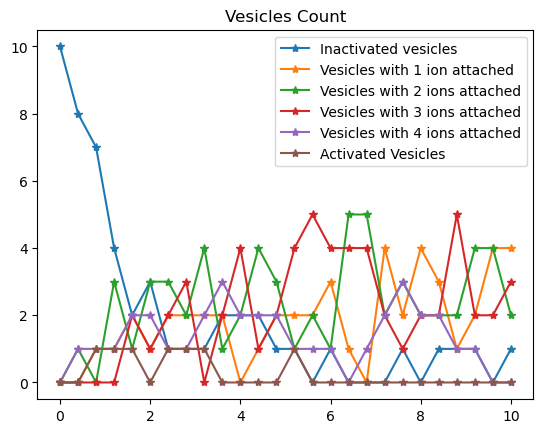

In [14]:
plt.plot(time[::20]*1e-3, counts[0::20,1:], "*-", label="ReaDDy")
plt.legend(['Inactivated vesicles', 'Vesicles with 1 ion attached','Vesicles with 2 ions attached',
            'Vesicles with 3 ions attached','Vesicles with 4 ions attached',
            'Activated Vesicles'], loc='best')
plt.title('Vesicles Count')

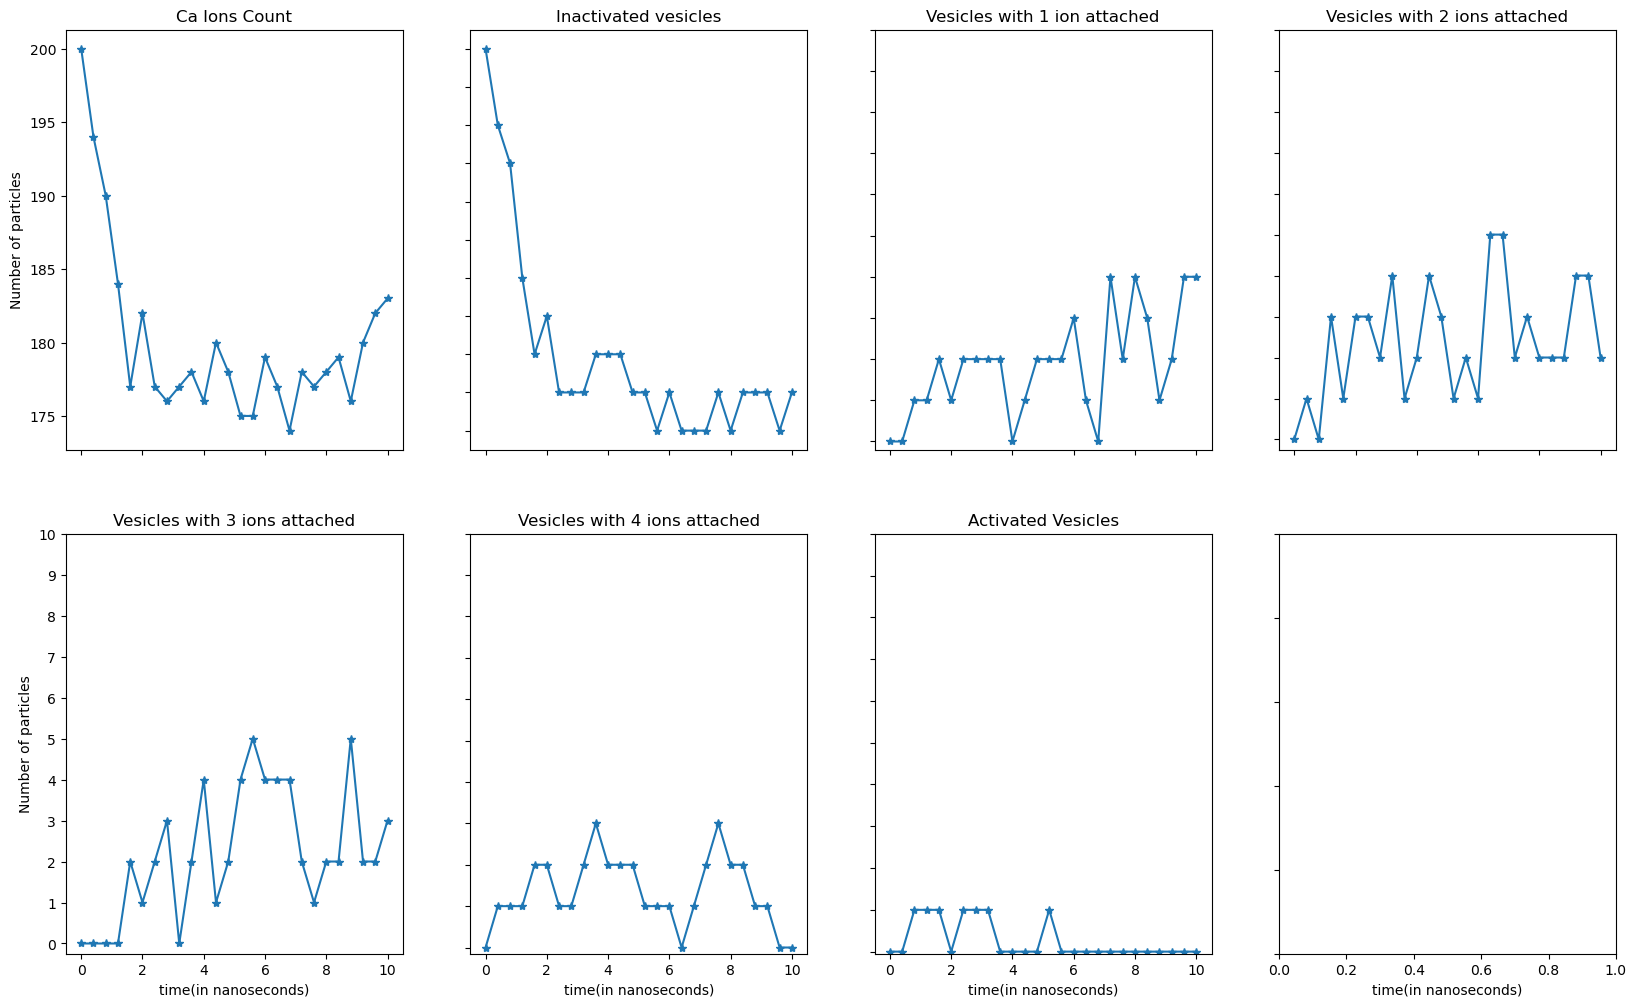

In [15]:
fig, axs = plt.subplots(2, 4, figsize=(20,12))
axs[0, 0].plot(time[::20]*1e-3, counts[::20,0], "*-")
axs[0, 0].set_title('Ca Ions Count')
axs[0, 1].plot(time[::20]*1e-3, counts[0::20,1], "*-")
axs[0, 1].set_title('Inactivated vesicles')
axs[0, 1].set_yticks(np.arange(0, 11, step=1)) 
axs[0, 2].plot(time[::20]*1e-3, counts[0::20,2], "*-")
axs[0, 2].set_title('Vesicles with 1 ion attached')
axs[0, 2].set_yticks(np.arange(0, 11, step=1)) 
axs[0, 3].plot(time[::20]*1e-3, counts[0::20,3], "*-")
axs[0, 3].set_title('Vesicles with 2 ions attached')
axs[0, 3].set_yticks(np.arange(0, 11, step=1)) 
axs[1, 0].plot(time[::20]*1e-3, counts[0::20,4], "*-")
axs[1, 0].set_title('Vesicles with 3 ions attached')
axs[1, 0].set_yticks(np.arange(0, 11, step=1)) 
axs[1, 1].plot(time[::20]*1e-3, counts[0::20,5], "*-")
axs[1, 1].set_title('Vesicles with 4 ions attached')
axs[1, 1].set_yticks(np.arange(0, 11, step=1)) 
axs[1, 2].plot(time[::20]*1e-3, counts[0::20,6], "*-")
axs[1, 2].set_title('Activated Vesicles')
axs[1, 2].set_yticks(np.arange(0, 11, step=1)) 

for ax in axs.flat:
    ax.set(xlabel='time(in nanoseconds)', ylabel='Number of particles')
for ax in axs.flat: